In [1]:
!pip install pyforest
from pyforest import *
lazy_imports()

['from sklearn.linear_model import Lasso',
 'import lightgbm as lgb',
 'from pathlib import Path',
 'import glob',
 'from sklearn.preprocessing import StandardScaler',
 'import matplotlib as mpl',
 'from xlrd import open_workbook',
 'import datetime as dt',
 'import keras',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.model_selection import StratifiedKFold',
 'import numpy as np',
 'import statsmodels.api as sm',
 'from sklearn.cluster import KMeans',
 'from scipy import stats',
 'import matplotlib.pyplot as plt',
 'from sklearn import svm',
 'import imutils',
 'import random',
 'from sklearn.preprocessing import OneHotEncoder',
 'import gensim',
 'import dash',
 'import altair as alt',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.manifold import TSNE',
 'from sklearn.impute import SimpleImputer',
 'import re',
 'import fastai',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import KFold',
 'import statis

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [242]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
for column in df:
    print(column)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


<Axes: >

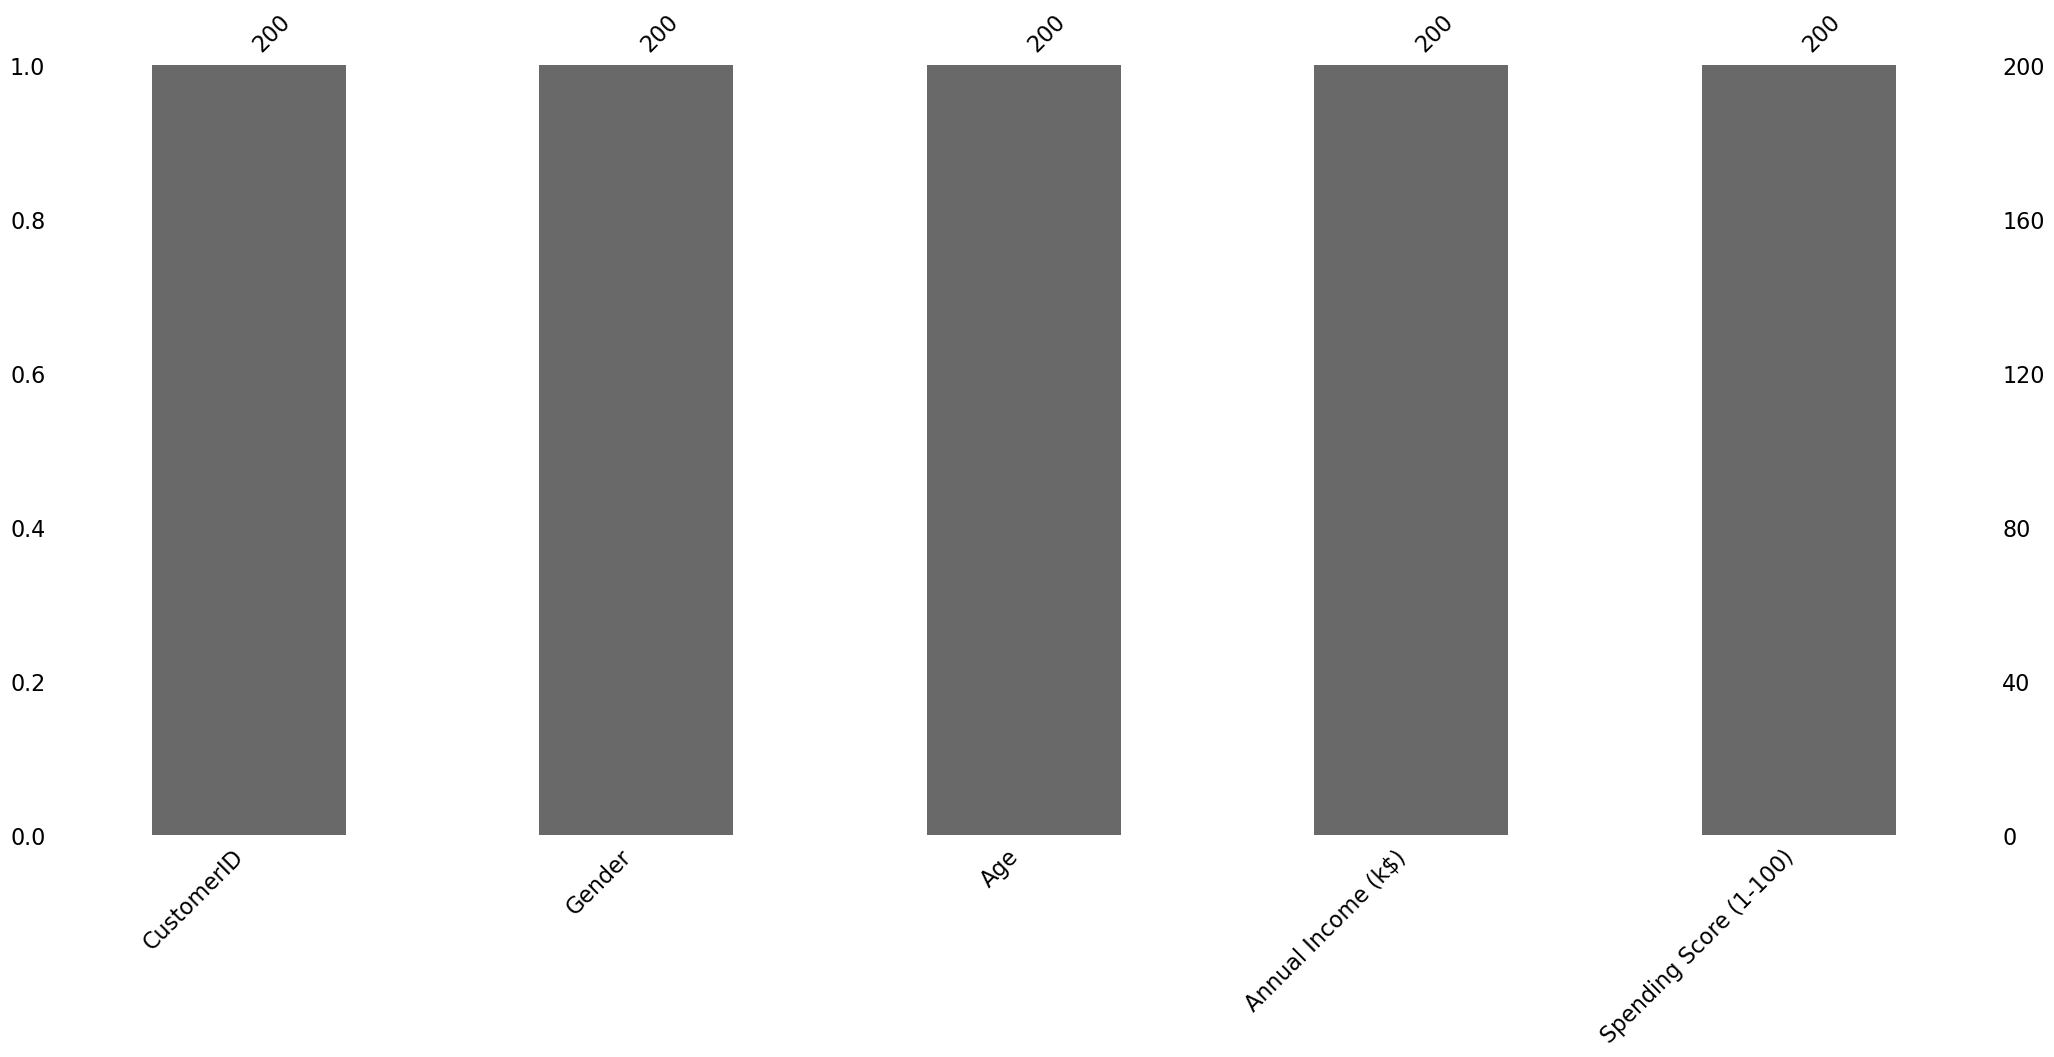

In [14]:
!pip install missingno
import missingno as msgn
msgn.bar(df)   # to find out % of missing values

### Visualization & EDA

In [20]:
import warnings
warnings.filterwarnings("ignore")   # to stop showing errors

In [19]:
!pip install sweetviz
import sweetviz as sv
report1=sv.analyze(df)
report1.show_html('report1.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:85: execution error: File some object wasn’t found. (-43)


In [21]:
df.to_csv('df.csv')

Shape of your Data Set loaded: (200, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    6 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', 'CustomerID']
To fix these data quality issues in the da

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,199.000000,Possible ID column: drop before modeling step.
CustomerID,int64,0.000000,100,1.000000,200.000000,Possible ID column: drop before modeling step.
Gender,object,0.000000,1,,,No issue
Age,int64,0.000000,25,18.000000,70.000000,No issue
Annual Income (k$),int64,0.000000,32,15.000000,137.000000,Column has 2 outliers greater than upper bound (132.75) or lower than lower bound(-13.25). Cap them or remove them.
Spending Score (1-100),int64,0.000000,42,1.000000,99.000000,No issue


Number of All Scatter Plots = 6


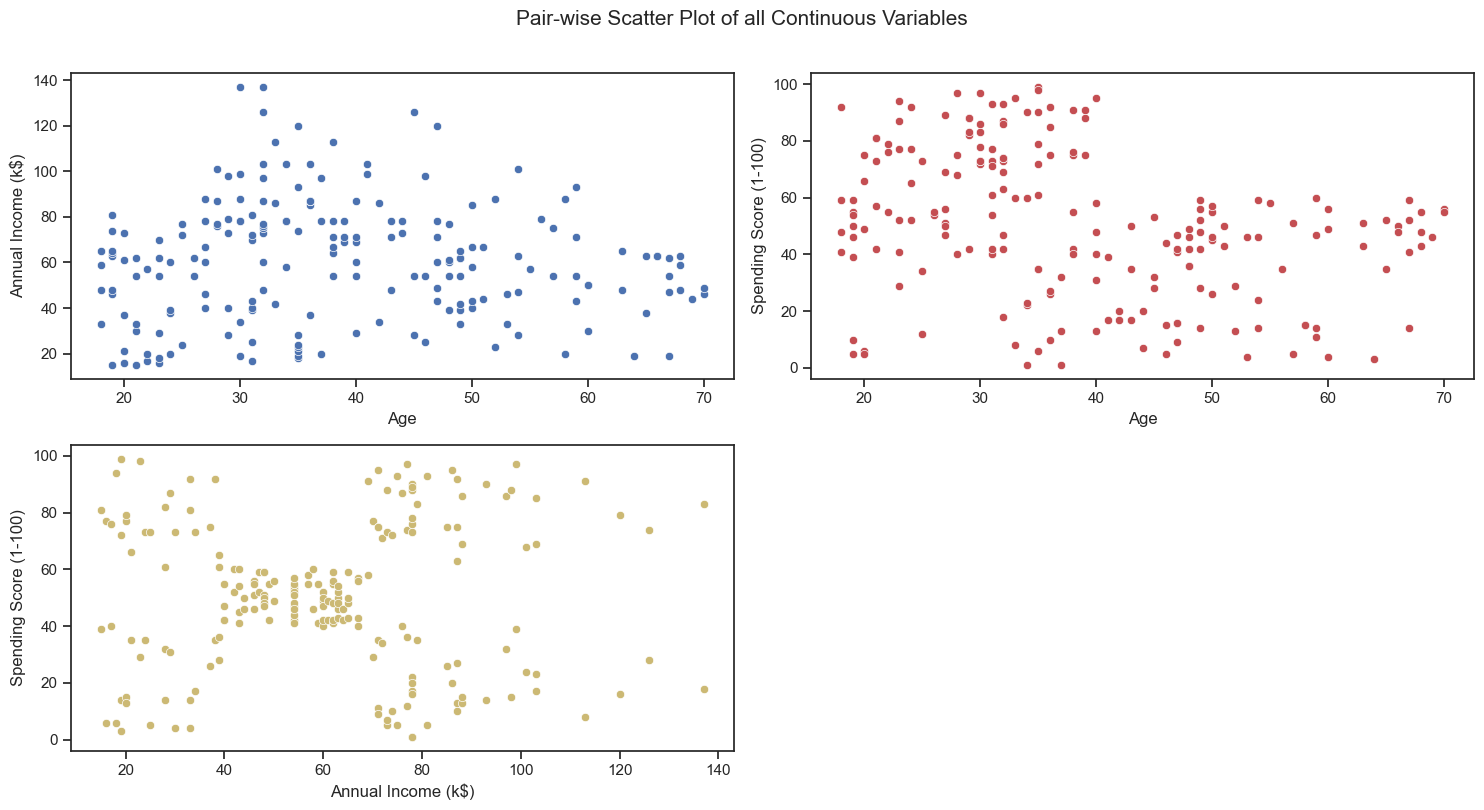

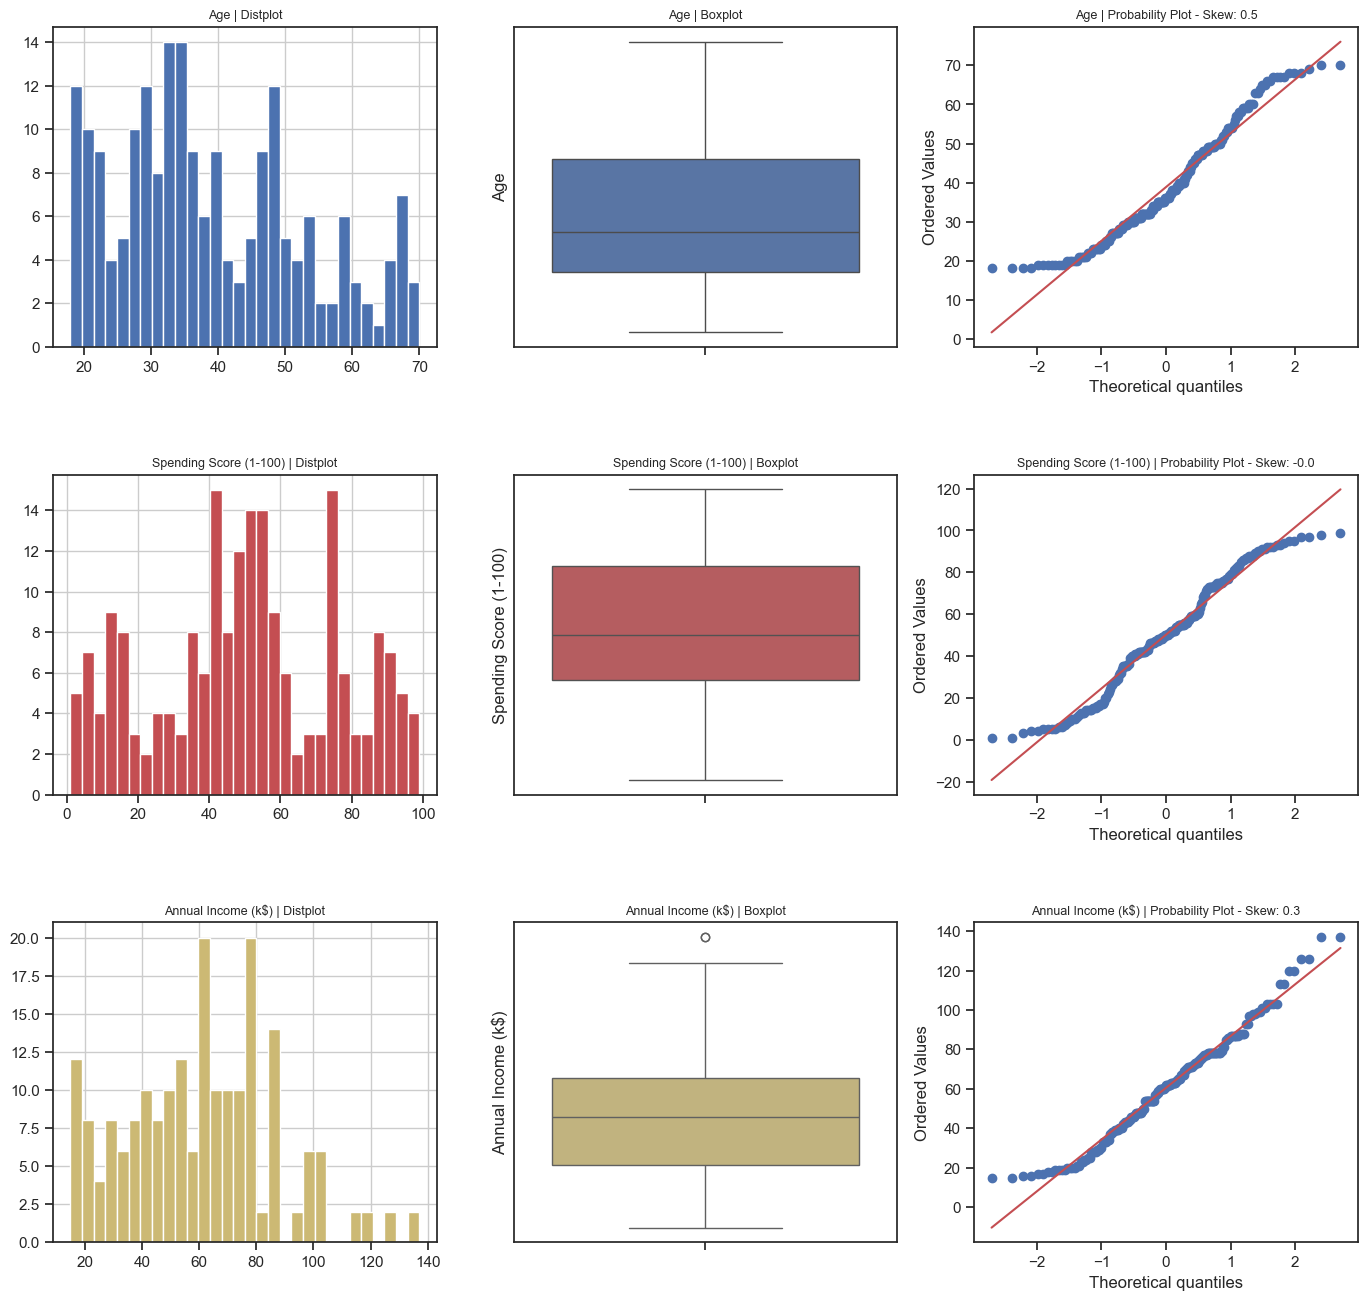

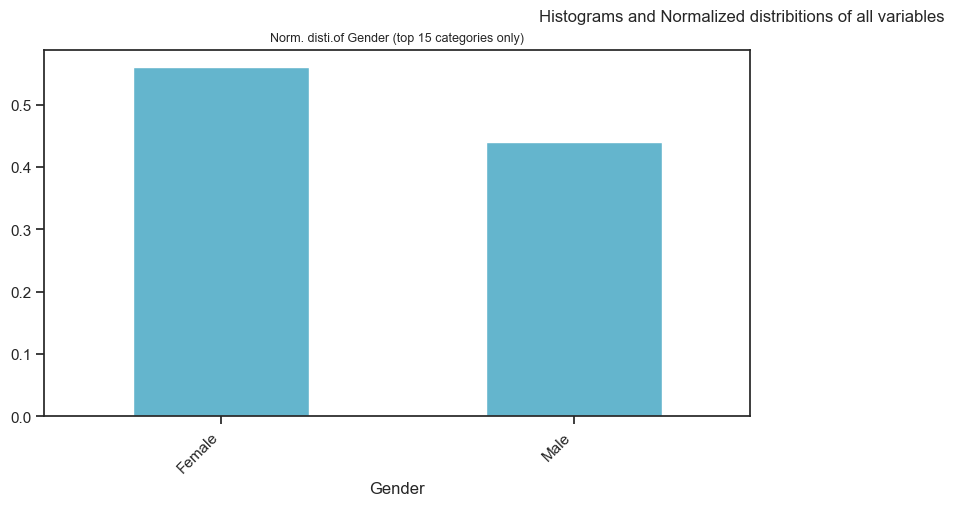

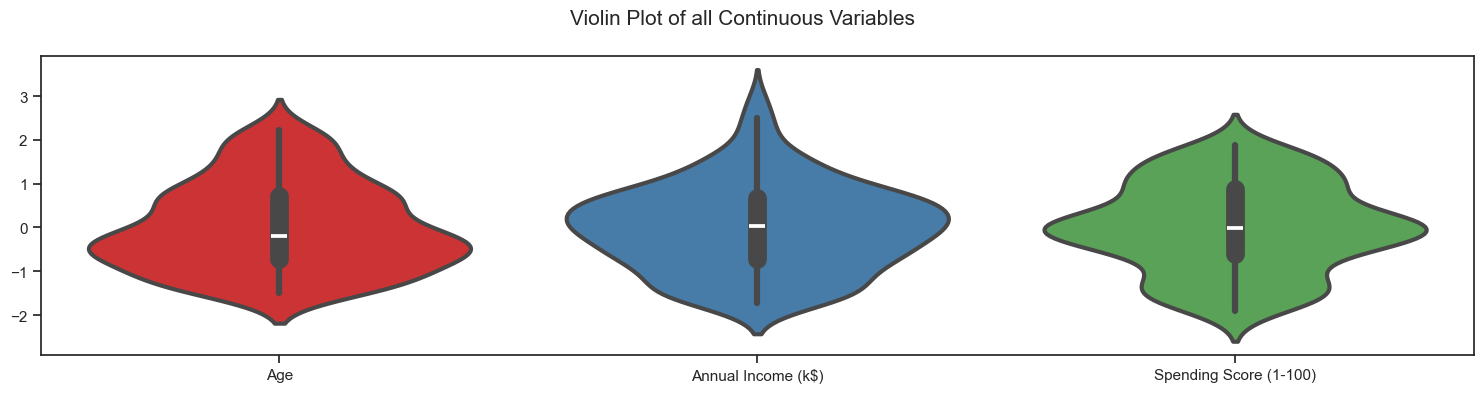

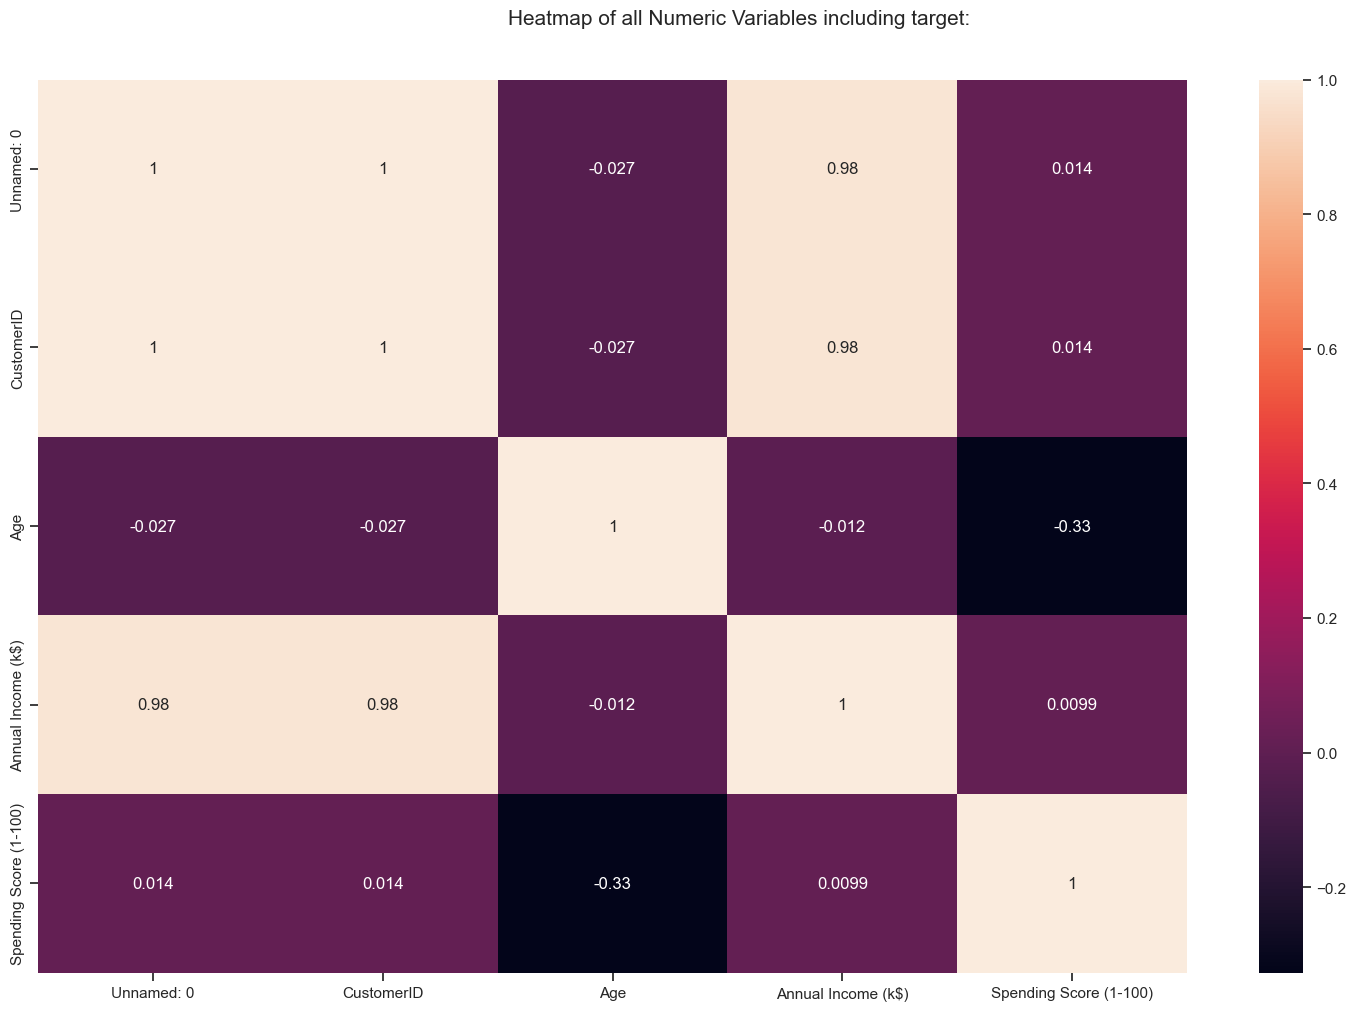

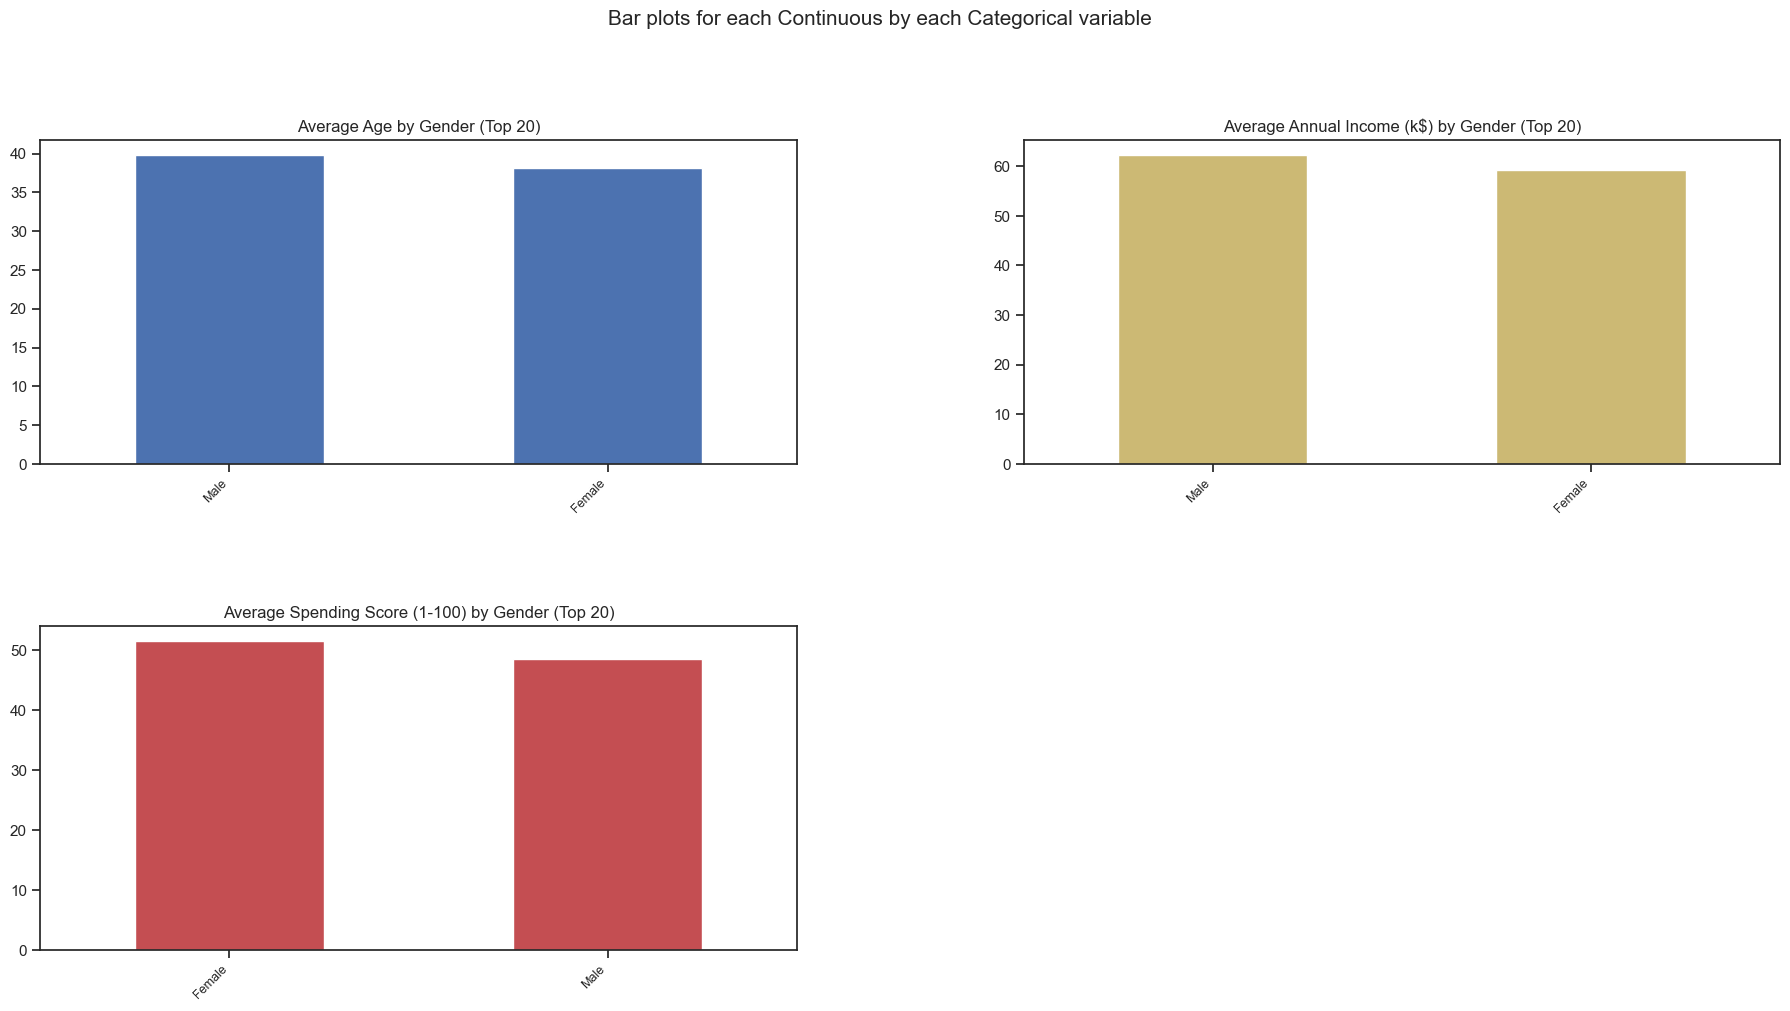

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40
5,5,6,Female,22,17,76
6,6,7,Female,35,18,6
7,7,8,Female,23,18,94
8,8,9,Male,64,19,3
9,9,10,Female,30,19,72


In [33]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
av=AutoViz_Class()
report2=av.AutoViz('df.csv', sep=',')
report2

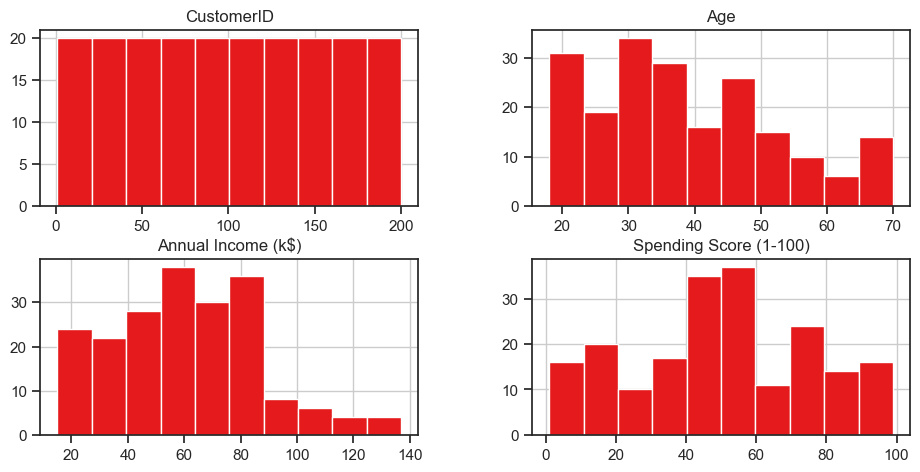

In [95]:
df.hist(figsize=(10,5))
plt.show()


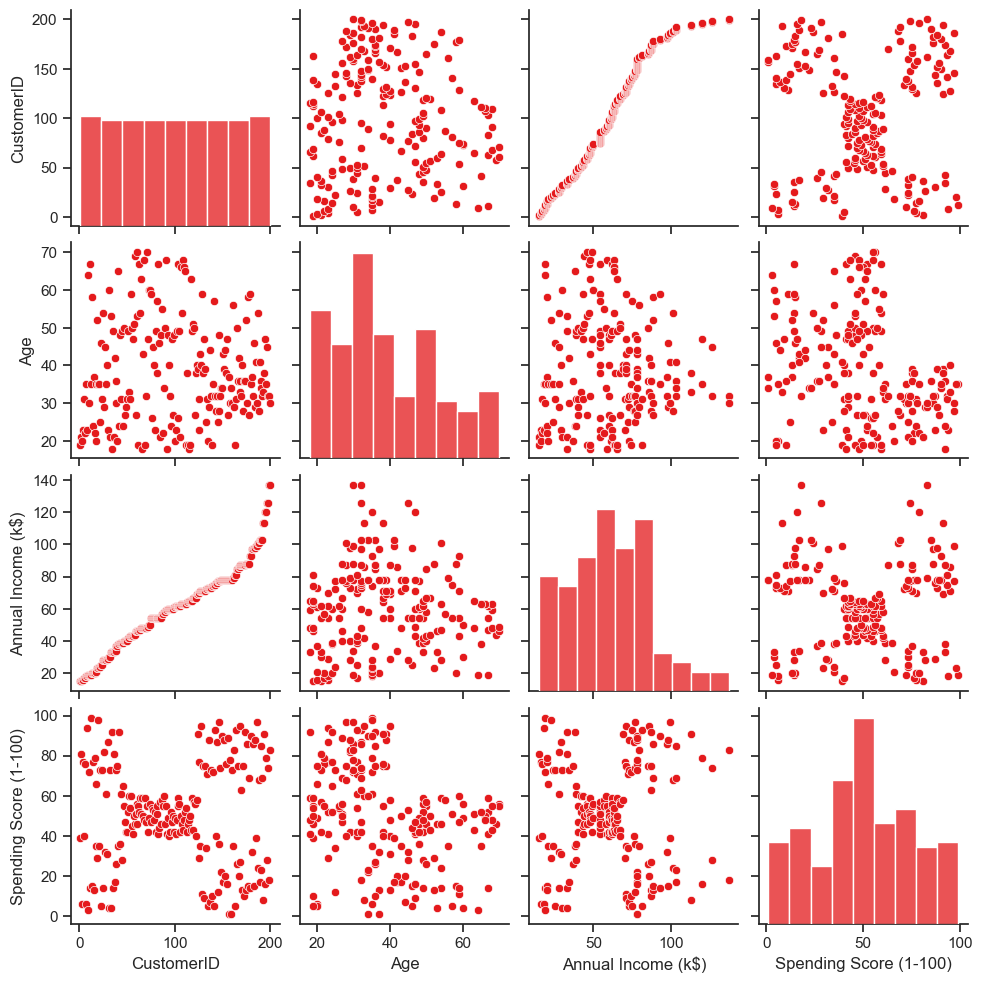

In [105]:
sns.pairplot(df)
plt.show()

In [103]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

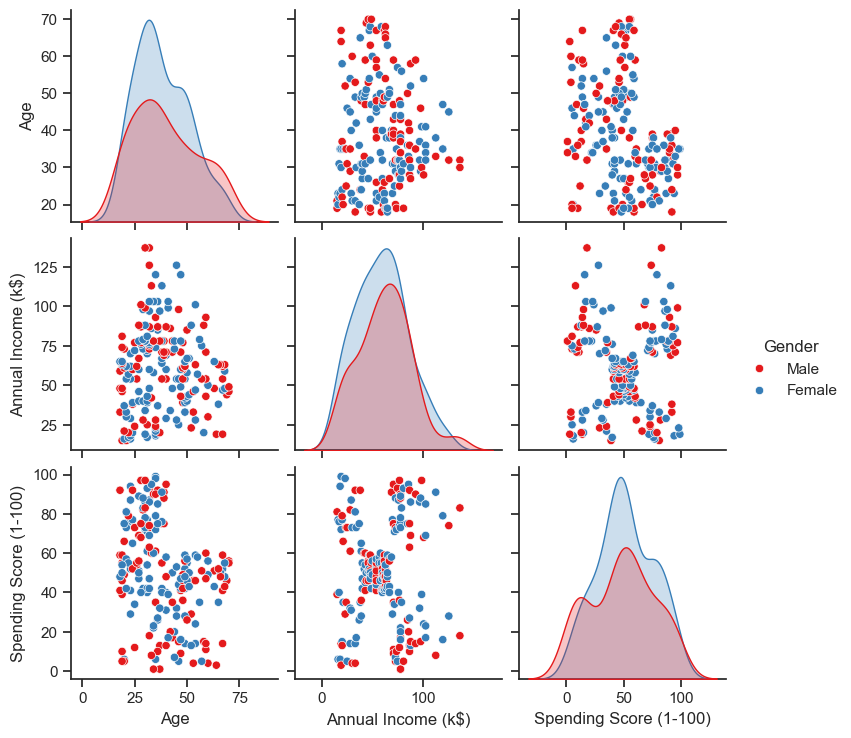

In [112]:
sns.pairplot(df, vars=[ 'Age', 'Annual Income (k$)','Spending Score (1-100)'], hue='Gender')
plt.show()

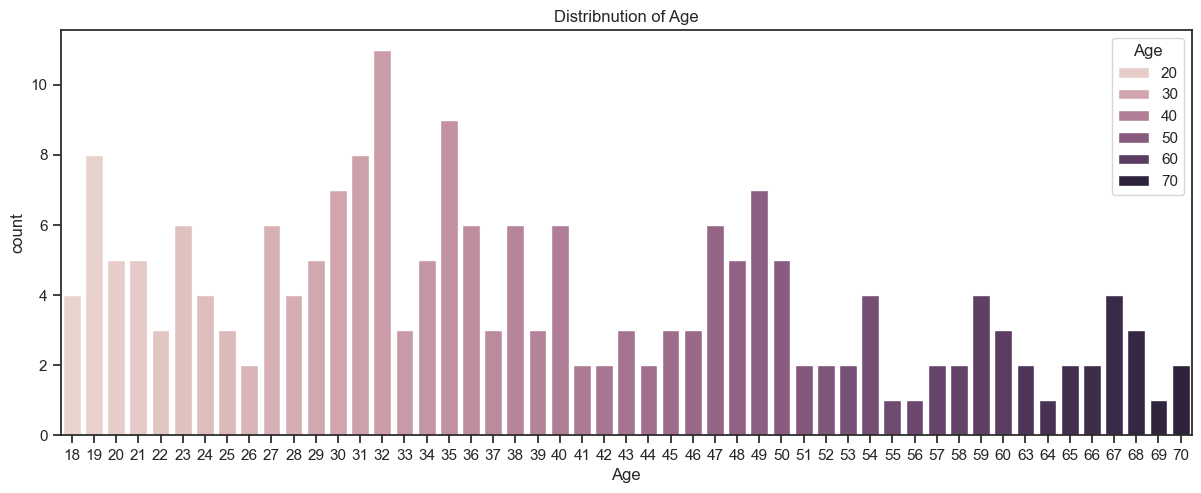

In [131]:
plt.figure(figsize=(13,5))
sns.countplot(df, x=df.Age, hue=df['Age'])
plt.title('Distribnution of Age')
plt.show()

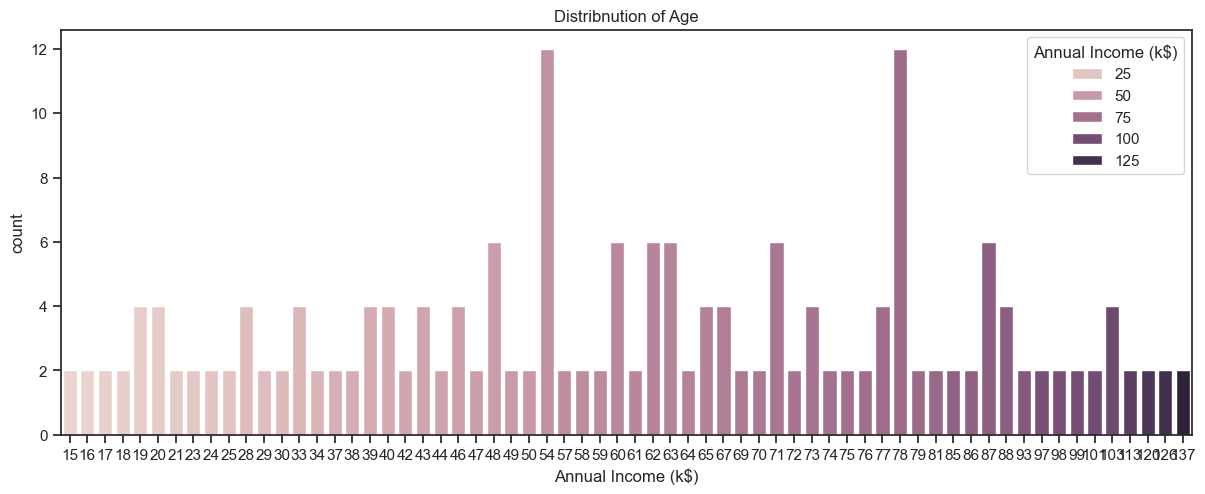

In [151]:
plt.figure(figsize=(13,5))
sns.countplot(df, x=df['Annual Income (k$)'], hue=df['Annual Income (k$)'])
plt.title('Distribnution of Age')
plt.show()

Text(0.5, 1.0, 'Distribnution of Spending Score (1-100)')

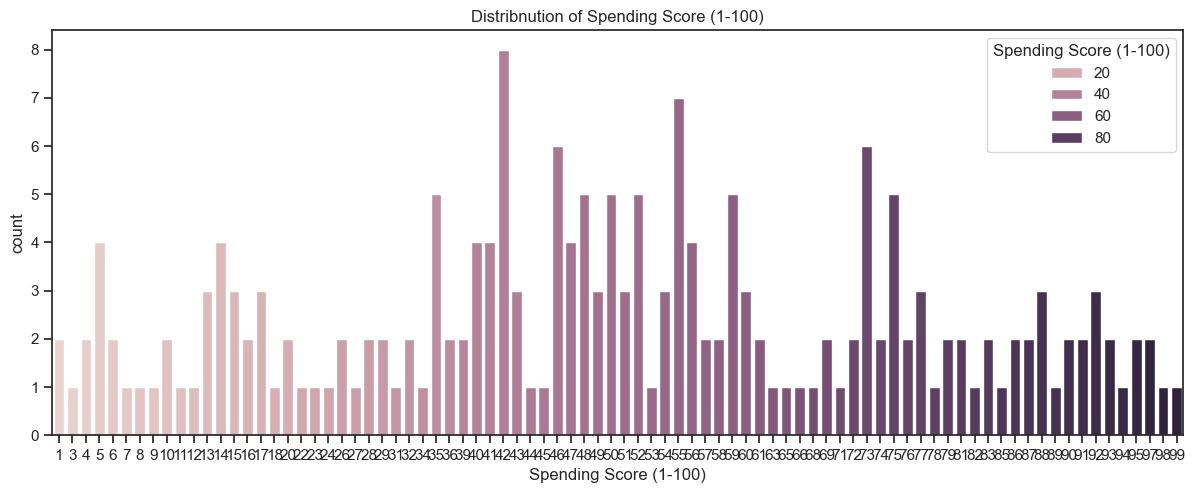

In [141]:
plt.figure(figsize = (13,5))
sns.countplot(df, x=df['Spending Score (1-100)'], hue=df['Spending Score (1-100)'])
plt.title("Distribnution of Spending Score (1-100)")

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.09E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

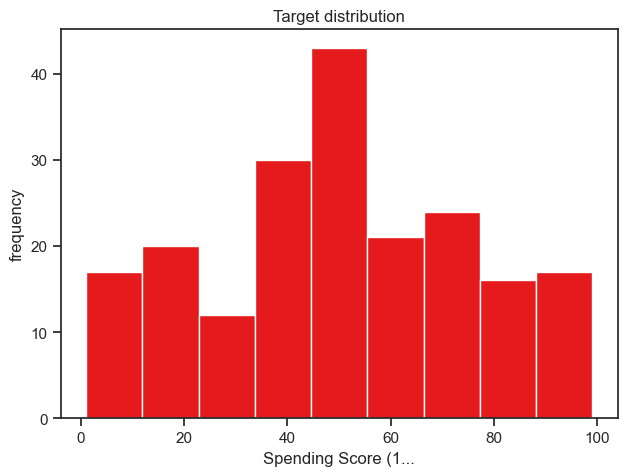

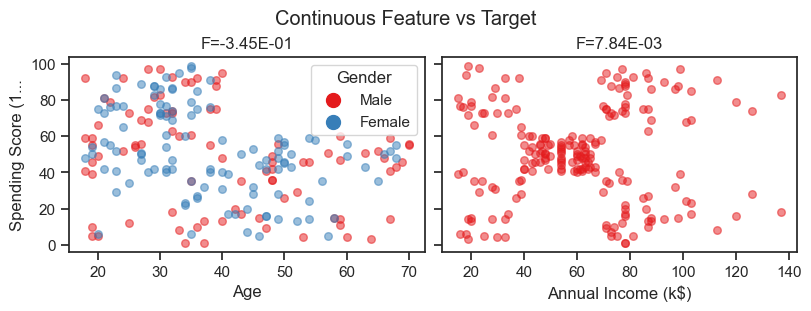

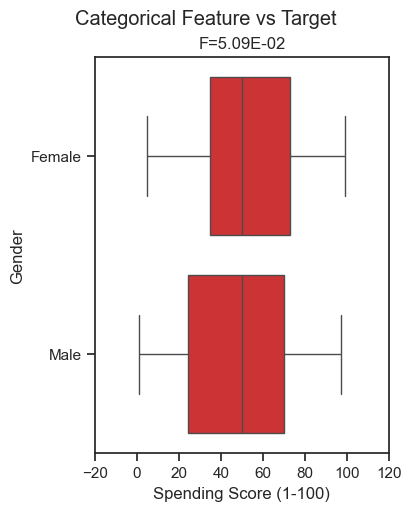

In [153]:
!pip install dabl
import dabl
dabl.plot(df, target_col='Spending Score (1-100)')

In [246]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: >

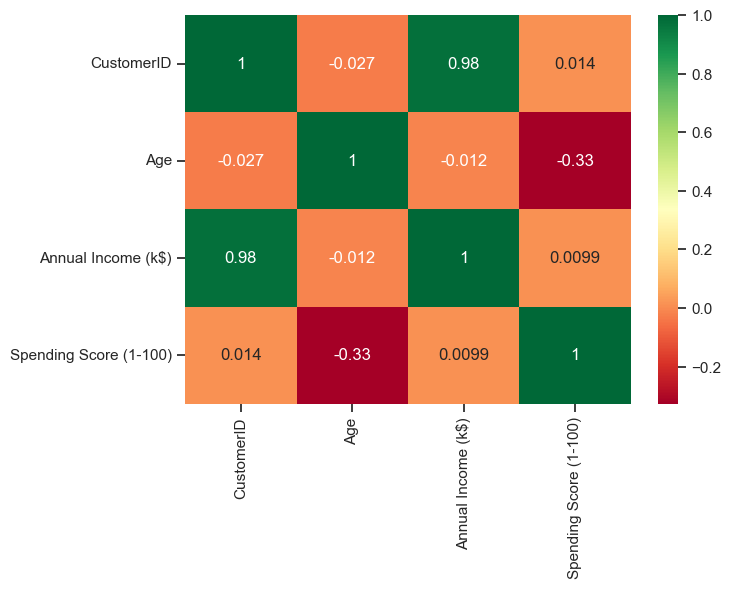

In [159]:
sns.heatmap(df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='RdYlGn' )

Text(0, 0.5, 'Annual Income (k$)')

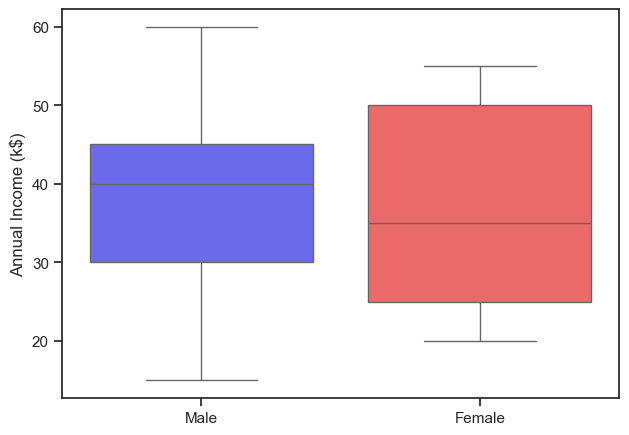

In [196]:
sns.boxplot(x=data['Gender'], y=data["Annual Income (k$)"], hue=data['Gender'], palette='seismic')
plt.ylabel('Annual Income (k$)')

### K-Means clustering

In [247]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [252]:
df=df.rename(columns={'Annual Income (k$)' : 'Annual_income' , 'Spending Score (1-100)':'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [256]:
clus_df= df.iloc[:,3:]
clus_df.head()

,Annual_income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [271]:
arra = np.array(clus_df)
arra

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Determining No. of Clusters Required
#### The Elbow Method

Clusters: 1 --> WCSS: 269981.28, Silhouette Score: N/A
Clusters: 2 --> WCSS: 185917.14, Silhouette Score: 0.46
Clusters: 3 --> WCSS: 106348.37, Silhouette Score: 0.46
Clusters: 4 --> WCSS: 73679.79, Silhouette Score: 0.46
Clusters: 5 --> WCSS: 44448.46, Silhouette Score: 0.46
Clusters: 6 --> WCSS: 38858.96, Silhouette Score: 0.46
Clusters: 7 --> WCSS: 31969.43, Silhouette Score: 0.46
Clusters: 8 --> WCSS: 29858.48, Silhouette Score: 0.46
Clusters: 9 --> WCSS: 22209.85, Silhouette Score: 0.46
Clusters: 10 --> WCSS: 20786.94, Silhouette Score: 0.46


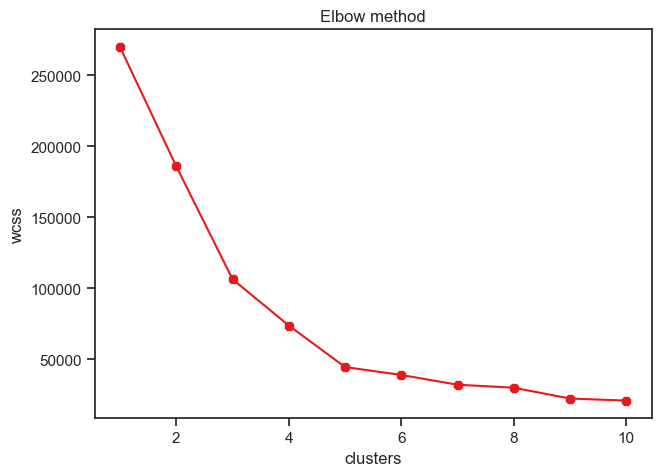

In [349]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(i, init='k-means++', random_state=0 ) # nit='k-means++' is inertia =distance between the point to centroid
    km.fit(arra)
    wcss.append(km.inertia_)

    y_pred_clu = kmeans.predict(arra)
    si_score = silhouette_score(arra, y_pred_clu) if i > 1 else None
    silhouette_scores.append(si_score)
    if si_score is not None:
        print(f'Clusters: {i} --> WCSS: {wcss[-1]:.2f}, Silhouette Score: {si_score:.2f}')
    else:
        print(f'Clusters: {i} --> WCSS: {wcss[-1]:.2f}, Silhouette Score: N/A')

plt.plot(range(1,11), wcss, marker='8')  # plt.plot(range(1,11), wcss, marker='8') 
plt.title('Elbow method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [350]:
# building KMeans cluster model

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=45)
kmeans.fit(clus_df)

pred=kmeans.predict(arra)
pred

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [351]:
kmeans.cluster_centers_

array([[108.18181818,  82.72727273],
       [ 48.26      ,  56.48      ],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714],
       [ 87.        ,  18.63157895]])

In [352]:
clus_df1=clus_df.copy()
clus_df1.head()

,Annual_income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [353]:
clus_df1['pred']=pred
clus_df1.head()

,Annual_income,Spending_Score,pred
0,15,39,2
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,2


In [365]:
centroids = kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

Text(0, 0.5, 'Spending_Score')

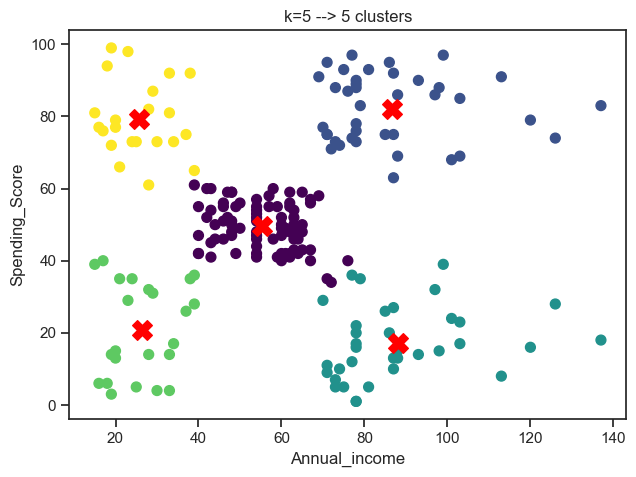

In [383]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(np.array(clus_df))

y_pred = kmeans.predict(np.array(clus_df))

plt.scatter(np.array(clus_df)[:, 0], np.array(clus_df)[:, 1], c=y_pred, s=50, cmap='viridis' , marker='o') # all data points
plt.scatter(centroids[:,0], centroids[:,1], marker='X' , s=200, c='red')
plt.title('k=5 --> 5 clusters')
plt.xlabel('Annual_income')
plt.ylabel('Spending_Score')

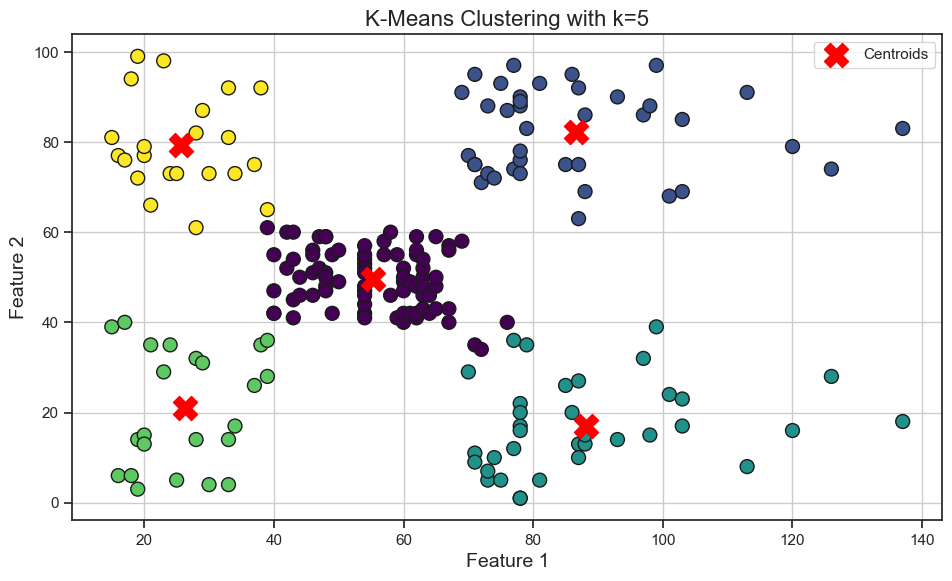

In [280]:
# Choose the optimal number of clusters (for visualization, let's use k=5)
k = 5
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
km.fit(arra)
y_pred_clu = km.predict(arra)

# Step to visualize the clusters and their centroids
plt.figure(figsize=(10, 6))

# Scatter plot of the data points, colored by cluster
plt.scatter(arra[:, 0], arra[:, 1], 
            c=y_pred_clu, 
            cmap='viridis', 
            marker='o', 
            edgecolor='k', 
            s=100)

# Plot the cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', 
            marker='X', 
            s=300, 
            label='Centroids')

# Add labels and title
plt.title(f'K-Means Clustering with k={optimal_k}', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [308]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=